In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.model_selection import cross_val_score
import matplotlib
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Aj.Tee_class\Data\TrainingSet_10Year_new_feature.csv")
df

,DATE,CPI,M1SL,PLR,DEBT,REL,RFS
0,1/1/2010,217.488,1674.7,3.25,12.770000,3761.327500,159109
1,1/2/2010,217.281,1699.8,3.25,12.770000,3725.816575,159625
2,1/3/2010,217.353,1711.9,3.25,12.770000,3704.847720,163034
3,1/4/2010,217.403,1699.0,3.25,13.200000,3714.620775,164423
4,1/5/2010,217.290,1710.1,3.25,13.200000,3702.699250,163033
...,...,...,...,...,...,...,...
139,1/8/2021,273.092,19728.7,3.25,28.430000,4685.879600,229033
140,1/9/2021,274.214,19872.5,3.25,28.430000,4702.432580,230474
141,1/10/2021,276.590,20063.5,3.25,29.617215,4722.846375,231636
142,1/11/2021,278.524,20279.7,3.25,29.617215,4748.913875,231829


In [3]:
df['date'] = df.apply( lambda x : float(x.DATE.split('/')[0]) , axis = 1)
df['month'] = df.apply( lambda x : float(x.DATE.split('/')[1]) , axis = 1)
df['year'] = df.apply( lambda x : float(x.DATE.split('/')[2][-2:]) , axis = 1)

In [4]:
df['DATE'] = df.apply(lambda x : x.DATE.replace('/','-'),axis = 1)
df['DATE'] = df.apply(lambda x : datetime.strptime(x.DATE, '%d-%m-%Y'),axis = 1)

In [5]:
df['M1SL_new'] = (df.M1SL - df.M1SL.mean()) / df.M1SL.std()
df['PLR_new'] = (df.PLR - df.PLR.mean()) / df.PLR.std()
df['DEBT_new'] = (df.DEBT - df.DEBT.mean()) / df.DEBT.std()
df['REL_new'] = (df.REL - df.REL.mean()) / df.REL.std()
df['RFS_new'] = (df.RFS - df.RFS.mean()) / df.RFS.std()
df['month_new'] = (df.month - df.month.mean()) / df.month.std()
df['year_new'] = (df.year - df.year.mean()) / df.year.std()

In [6]:
dfnew = df[['CPI','M1SL_new','PLR_new','DEBT_new','REL_new','RFS_new','month_new','year_new']]

In [7]:
dfnew

,CPI,M1SL_new,PLR_new,DEBT_new,REL_new,RFS_new,month_new,year_new
0,217.488,-0.623996,-0.59388,-1.560032,-0.546753,-1.751827,-1.587713,-1.587713
1,217.281,-0.619392,-0.59388,-1.560032,-0.626953,-1.722066,-1.299038,-1.587713
2,217.353,-0.617173,-0.59388,-1.560032,-0.674311,-1.525453,-1.010363,-1.587713
3,217.403,-0.619539,-0.59388,-1.462051,-0.652238,-1.445343,-0.721688,-1.587713
4,217.290,-0.617503,-0.59388,-1.462051,-0.679163,-1.525511,-0.433013,-1.587713
...,...,...,...,...,...,...,...,...
139,273.092,2.687681,-0.59388,2.008281,1.541308,2.281021,0.433013,1.587713
140,274.214,2.714058,-0.59388,2.008281,1.578693,2.364130,0.721688,1.587713
141,276.590,2.749094,-0.59388,2.278802,1.624796,2.431148,1.010363,1.587713
142,278.524,2.788751,-0.59388,2.278802,1.683669,2.442280,1.299038,1.587713


In [8]:
#from sklearn.model_selection import train_test_split
#df_train, df_test = train_test_split(df, test_size=0.3,)
#df_test = df_test.sort_values(by='DATE')

### .iloc[ begin_row : end_row , begin_column : end_column ]

In [9]:
#y_fit = df_train.iloc[:,1].values
#x_fit = df_train[['M1SL','PLR','DEBT','month','year']].astype(float).values

y_plot_all = df.iloc[:,1].values

y_plot = df.iloc[120:134,1].values
x_plot = df.iloc[120:134,10:].astype(float).values


y_all = df.iloc[:116,1].values
x_all = df.iloc[:116,10:].astype(float).values

#โชว์แกนxเป็นวันที่เทียบกับy
x_plotshow = df.iloc[:,0].values


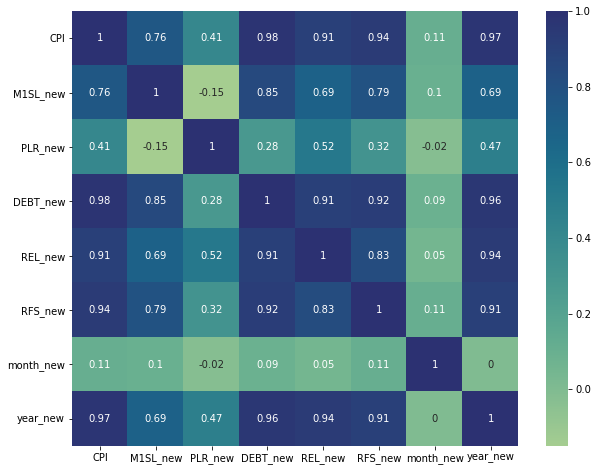

In [12]:
##สร้าง Heat map ##
#สร้างสหสัมพันธ์#
plt.figure(figsize = (10, 8))
corr_val = dfnew.corr().round(2)
corr_val 
sns.heatmap(corr_val, annot = True,cmap="crest")

plt.savefig('heat_map.png', transparent = True, dpi = 100)

In [11]:
#sns.pairplot(dfnew)

In [10]:
x_all.shape

(116, 7)

In [11]:
y_all.shape

(116,)

In [14]:
#x_plot = df_test[['M1SL','PLR','DEBT','month','year']].astype(float).values
#x_plot.shape

In [12]:
df

,DATE,CPI,M1SL,PLR,DEBT,REL,RFS,date,month,year,M1SL_new,PLR_new,DEBT_new,REL_new,RFS_new,month_new,year_new
0,2010-01-01,217.488,1674.7,3.25,12.770000,3761.327500,159109,1.0,1.0,10.0,-0.623996,-0.59388,-1.560032,-0.546753,-1.751827,-1.587713,-1.587713
1,2010-02-01,217.281,1699.8,3.25,12.770000,3725.816575,159625,1.0,2.0,10.0,-0.619392,-0.59388,-1.560032,-0.626953,-1.722066,-1.299038,-1.587713
2,2010-03-01,217.353,1711.9,3.25,12.770000,3704.847720,163034,1.0,3.0,10.0,-0.617173,-0.59388,-1.560032,-0.674311,-1.525453,-1.010363,-1.587713
3,2010-04-01,217.403,1699.0,3.25,13.200000,3714.620775,164423,1.0,4.0,10.0,-0.619539,-0.59388,-1.462051,-0.652238,-1.445343,-0.721688,-1.587713
4,2010-05-01,217.290,1710.1,3.25,13.200000,3702.699250,163033,1.0,5.0,10.0,-0.617503,-0.59388,-1.462051,-0.679163,-1.525511,-0.433013,-1.587713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-08-01,273.092,19728.7,3.25,28.430000,4685.879600,229033,1.0,8.0,21.0,2.687681,-0.59388,2.008281,1.541308,2.281021,0.433013,1.587713
140,2021-09-01,274.214,19872.5,3.25,28.430000,4702.432580,230474,1.0,9.0,21.0,2.714058,-0.59388,2.008281,1.578693,2.364130,0.721688,1.587713
141,2021-10-01,276.590,20063.5,3.25,29.617215,4722.846375,231636,1.0,10.0,21.0,2.749094,-0.59388,2.278802,1.624796,2.431148,1.010363,1.587713
142,2021-11-01,278.524,20279.7,3.25,29.617215,4748.913875,231829,1.0,11.0,21.0,2.788751,-0.59388,2.278802,1.683669,2.442280,1.299038,1.587713


In [13]:
df_train , df_test = train_test_split(df,test_size=20)
df_test = df_test.sort_values(by='DATE')

x_all_norm_train = df_train.iloc[:,10:].values
y_all_norm_train = df_train.iloc[:,1].values

x_all_norm_test = df_test.iloc[:,10:].values
y_all_norm_test = df_test.iloc[:,1].values

In [17]:
#df.info()

In [18]:
#M1SL_mean = df.M1SL.mean()
#M1SL_std = df.M1SL.std()

In [14]:
datetime_str = '1-1-2010'
date_object = datetime.strptime(datetime_str, '%d-%m-%Y').date()
date_object

datetime.date(2010, 1, 1)

In [15]:
np.asarray(df.iloc[:,0], dtype='datetime64[s]')

array(['2010-01-01T00:00:00', '2010-02-01T00:00:00',
       '2010-03-01T00:00:00', '2010-04-01T00:00:00',
       '2010-05-01T00:00:00', '2010-06-01T00:00:00',
       '2010-07-01T00:00:00', '2010-08-01T00:00:00',
       '2010-09-01T00:00:00', '2010-10-01T00:00:00',
       '2010-11-01T00:00:00', '2010-12-01T00:00:00',
       '2011-01-01T00:00:00', '2011-02-01T00:00:00',
       '2011-03-01T00:00:00', '2011-04-01T00:00:00',
       '2011-05-01T00:00:00', '2011-06-01T00:00:00',
       '2011-07-01T00:00:00', '2011-08-01T00:00:00',
       '2011-09-01T00:00:00', '2011-10-01T00:00:00',
       '2011-11-01T00:00:00', '2011-12-01T00:00:00',
       '2012-01-01T00:00:00', '2012-02-01T00:00:00',
       '2012-03-01T00:00:00', '2012-04-01T00:00:00',
       '2012-05-01T00:00:00', '2012-06-01T00:00:00',
       '2012-07-01T00:00:00', '2012-08-01T00:00:00',
       '2012-09-01T00:00:00', '2012-10-01T00:00:00',
       '2012-11-01T00:00:00', '2012-12-01T00:00:00',
       '2013-01-01T00:00:00', '2013-02-01T00:0

In [16]:
parameters_rbf = {'kernel':['rbf'],'tol':[0.0001,1e-5], 
              'C':[10,50,100,200,500,1000,2000],
              #'C':list(np.arange(1500,3000,100)),  
              'epsilon':[0.001,0.002,0.004,0.005,0.01,0.1],
              #'epsilon':list(np.arange(0.001,0.01,0.001)) ,
              #'gamma': [0.001,0.005,0.008,0.01,0.1]
              'gamma':list(np.arange(0.001,0.05,0.002))
              }

In [69]:
parameters_poly = {'kernel':['poly'], 
              'C':[10,20,50],
              #'C':list(np.arange(20,50,1)),  
              #'epsilon':[0.001,0.002,0.003,0.004,0.005],
              'epsilon':list(np.arange(0.001,0.01,0.001)) ,
              'degree':[2,3,4] ,
              'gamma': [0.001,0.01,0.1]
              #'gamma':list(np.arange(0.0001,10,0.0001))
              }

In [70]:
parameters_linear = {'kernel':['linear'], 
              'C':[5],
              #'C':list(np.arange(1,10,1)), 
              'epsilon':[3],
              #'epsilon':list(np.arange(0.01,5,0.01))
              }

In [17]:
svr = svm.SVR()

In [18]:
cv_5_rbf = GridSearchCV(param_grid = parameters_rbf, estimator = svr , cv=5, )
cv_10_rbf = GridSearchCV(param_grid = parameters_rbf, estimator = svr , cv=10, )

In [19]:
cv_5_rbf.fit(x_all_norm_train ,y_all_norm_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 50, 100, 200, 500, 1000, 2000],
                         'epsilon': [0.001, 0.002, 0.004, 0.005, 0.01, 0.1],
                         'gamma': [0.001, 0.003, 0.005, 0.007,
                                   0.009000000000000001, 0.011,
                                   0.013000000000000001, 0.015, 0.017,
                                   0.019000000000000003, 0.021, 0.023, 0.025,
                                   0.027000000000000003, 0.029, 0.031, 0.033,
                                   0.035, 0.037000000000000005, 0.039, 0.041,
                                   0.043000000000000003, 0.045, 0.047, 0.049],
                         'kernel': ['rbf'], 'tol': [0.0001, 1e-05]})

In [90]:
cv_5_rbf.best_estimator_

SVR(C=2000, gamma=0.035, tol=0.0001)

In [21]:
cv_10_rbf.fit(x_all_norm_train ,y_all_norm_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [10, 50, 100, 200, 500, 1000, 2000],
                         'epsilon': [0.001, 0.002, 0.004, 0.005, 0.01, 0.1],
                         'gamma': [0.001, 0.003, 0.005, 0.007,
                                   0.009000000000000001, 0.011,
                                   0.013000000000000001, 0.015, 0.017,
                                   0.019000000000000003, 0.021, 0.023, 0.025,
                                   0.027000000000000003, 0.029, 0.031, 0.033,
                                   0.035, 0.037000000000000005, 0.039, 0.041,
                                   0.043000000000000003, 0.045, 0.047, 0.049],
                         'kernel': ['rbf'], 'tol': [0.0001, 1e-05]})

In [92]:
cv_10_rbf.best_estimator_

SVR(C=2000, gamma=0.045, tol=0.0001)

In [23]:
x_all_norm_test.shape

(20, 7)

In [24]:
y_all_norm_test.shape

(20,)

In [26]:
#y_rbf_all_cv5.shape

In [27]:
df_train_sort = df_train.sort_values(by='DATE')

In [28]:
x_all_norm_train_sort = df_train_sort.iloc[:,10:].values
y_all_norm_train_sort = df_train_sort.iloc[:,1].values

In [29]:
y_rbf_all_cv5_train = cv_5_rbf.best_estimator_.predict(x_all_norm_train_sort)
y_rbf_all_cv10_train = cv_10_rbf.best_estimator_.predict(x_all_norm_train_sort)

In [45]:
x_all_norm = df.iloc[:,10:].values
y_all_norm = df.iloc[:,1].values

In [46]:
y_rbf_all_cv5 = cv_5_rbf.best_estimator_.predict(x_all_norm)
y_rbf_all_cv10 = cv_10_rbf.best_estimator_.predict(x_all_norm)

In [30]:
len(df_train_sort.iloc[:,0])

124

### train set ploting

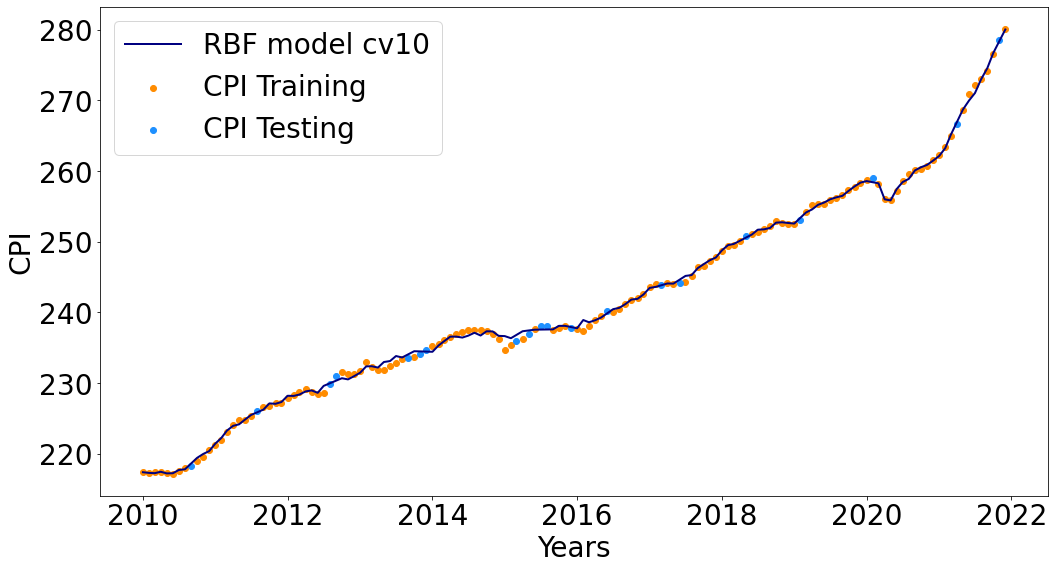

In [154]:
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
plt.figure(figsize=(17,9))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

lw = 2
plt.scatter(np.asarray(df_train_sort.iloc[:,0], dtype='datetime64[s]'), y_all_norm_train_sort, color='darkorange', label='CPI Training', )
plt.scatter(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), y_all_norm_test, color='dodgerblue', label='CPI Testing', )
#plt.plot(np.asarray(df_train_sort.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv5_train, color='green', lw=lw, label='RBF model cv5')
plt.plot(np.asarray(df_train_sort.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv10_train, color='navy', lw=lw, label='RBF model cv10')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv5, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv10, color='peru', lw=lw, label='Polynomial model')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_linear_all, color='gray', lw=lw, label='Linear model')

plt.xlabel('Years')
plt.ylabel('CPI')
#plt.title('Support Vector Regression')
plt.legend()
plt.savefig('plot_svr_all_model_10year.png', transparent = True, dpi = 100)
plt.show()

In [137]:
y_actual_train = y_all_norm_train_sort
y_predicted_train = y_rbf_all_cv10_train
 
MSE = mean_squared_error(y_actual_train, y_predicted_train)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4522891979033834


In [42]:
RMSE = math.sqrt((((y_actual_train-y_predicted_train)**2).sum())/116)
RMSE

19.817992847487172

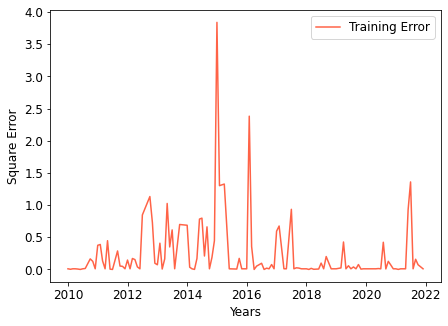

In [120]:
ES_train = (y_rbf_all_cv5_train-y_all_norm_train_sort)**2
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.plot(np.asarray(df_train_sort.iloc[:,0], dtype='datetime64[s]'), ES_train, color='tomato', label='Training Error')

plt.xlabel('Years')
plt.ylabel('Square Error')
plt.legend()

plt.savefig('plot_svr_square_error_10year.png', transparent = True, dpi = 80)
plt.show()

In [35]:
y_rbf_all_cv5_test = cv_5_rbf.best_estimator_.predict(x_all_norm_test)
y_rbf_all_cv10_test = cv_10_rbf.best_estimator_.predict(x_all_norm_test)

### test set ploting

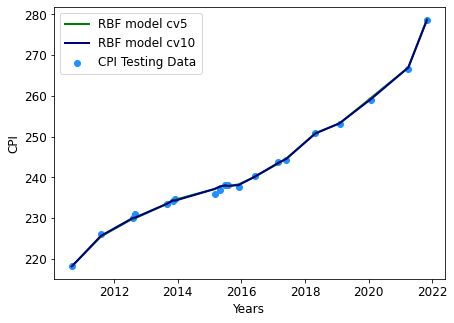

In [122]:
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

lw = 2
plt.scatter(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), y_all_norm_test, color='dodgerblue', label='CPI Testing Data', )

plt.plot(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv5_test, color='green', lw=lw, label='RBF model cv5')
plt.plot(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv10_test, color='navy', lw=lw, label='RBF model cv10')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv5, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv10, color='peru', lw=lw, label='Polynomial model')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_linear_all, color='gray', lw=lw, label='Linear model')

plt.xlabel('Years')
plt.ylabel('CPI')
#plt.title('Support Vector Regression')
plt.legend()

plt.savefig('plot_svr_testing.png', transparent = True, dpi = 80)
plt.show()

In [130]:
y_actual = y_all_norm_test
y_predicted = y_rbf_all_cv5_test
 
MSE = mean_squared_error(y_actual, y_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.49391485366295207


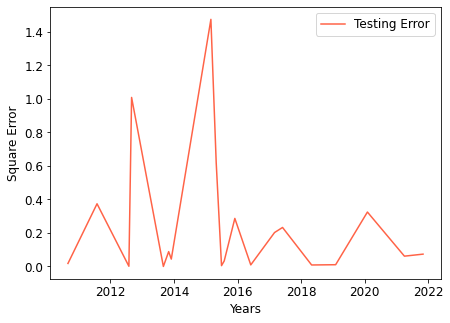

In [132]:
ES = (y_predicted-y_actual)**2
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.plot(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), ES, color='tomato', label='Testing Error')

plt.xlabel('Years')
plt.ylabel('Square Error')
plt.legend()
plt.savefig('plot_svr_square_error_test_set.png', transparent = True, dpi = 80)
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
y_true_train = y_actual_train
y_pred_train = y_rbf_all_cv10_train
mean_absolute_percentage_error(y_true_train, y_pred_train)

0.06262615074424577

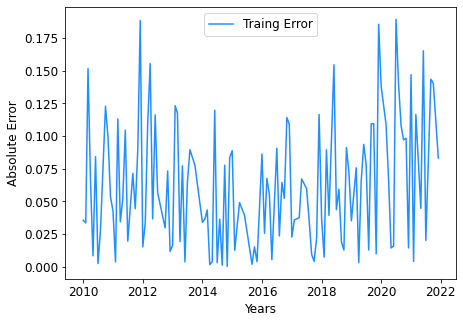

In [135]:
AE = np.absolute((y_true_train-y_pred_train)/y_true_train)

font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.plot(np.asarray(df_train_sort.iloc[:,0], dtype='datetime64[s]'), AE, color='dodgerblue', label='Traing Error')

plt.xlabel('Years')
plt.ylabel('Absolute Error')
plt.legend()

plt.savefig('plot_svr_absolute_error_train_set.png', transparent = True, dpi = 80)
plt.show()

In [142]:
from sklearn.metrics import mean_absolute_percentage_error
y_true_test = y_all_norm_train
y_pred_test = y_rbf_all_cv5_train
mean_absolute_percentage_error(y_true_test, y_pred_test)

0.0626329192353403

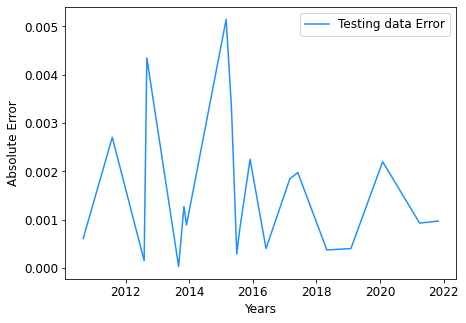

In [136]:
AE = np.absolute((y_true_test-y_pred_test)/y_true_test)

font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.plot(np.asarray(df_test.iloc[:,0], dtype='datetime64[s]'), AE, color='dodgerblue', label='Testing data Error')

plt.xlabel('Years')
plt.ylabel('Absolute Error')
plt.legend()

plt.savefig('plot_svr_absolute_error_test_set.png', transparent = True, dpi = 80)
plt.show()

In [84]:
cv_5_poly = GridSearchCV(param_grid = parameters_poly, estimator = svr , cv=5, )

In [85]:
cv_10_poly = GridSearchCV(param_grid = parameters_poly, estimator = svr , cv=10, )

In [ ]:
cv_5_poly.fit(x_all ,y_all)

In [ ]:
cv_10_poly.fit(x_all ,y_all)

In [80]:
cv_5_poly.best_estimator_

SVR(C=43, epsilon=5.29e-05, gamma=0.1, kernel='poly')

In [81]:
cv_10_poly.best_estimator_

SVR(C=43, epsilon=5.29e-05, gamma=0.1, kernel='poly')

In [43]:
cv_5_linear = GridSearchCV(param_grid = parameters_linear, estimator = svr , cv=5, )

In [46]:
cv_5_linear.fit(x_all ,y_all)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [5], 'epsilon': [3], 'kernel': ['linear']})

In [49]:
cv_5_linear.best_estimator_

SVR(C=5, epsilon=3, kernel='linear')

In [55]:
y_rbf_plot_cv5 = cv_5_rbf.best_estimator_.predict(x_plot)
y_rbf_plot_cv10 = cv_10_rbf.best_estimator_.predict(x_plot)
#y_poly_plot_cv5 = cv_5_poly.best_estimator_.predict(x_plot)
#y_poly_plot_cv10 = cv_10_poly.best_estimator_.predict(x_plot)
#y_linear_plot = cv_5_linear.best_estimator_.predict(x_plot)

In [27]:
#y_rbf[120:134].shape

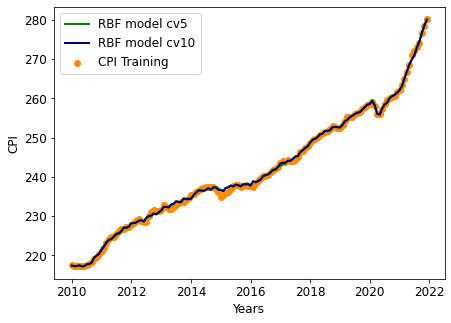

In [106]:
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

lw = 2
plt.scatter(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_plot_all, color='darkorange', label='CPI Training', )

plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv5[:], color='green', lw=lw, label='RBF model cv5')
plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_rbf_all_cv10[:], color='navy', lw=lw, label='RBF model cv10')

#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_poly_plot_cv5, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_poly_plot_cv10, color='peru', lw=lw, label='Polynomial model')

#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_linear_plot, color='gray', lw=lw, label='Linear model')

plt.xlabel('Years')
plt.ylabel('CPI')
#plt.title('Support Vector Regression')
plt.legend()

plt.savefig('plot_svr_all_model_10year.png', transparent = True, dpi = 100)
plt.show()

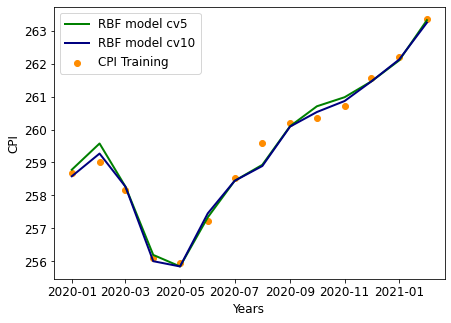

In [99]:
font = {#'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 0)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

lw = 2
plt.scatter(np.asarray(df.iloc[120:134,0], dtype='datetime64[s]'), y_plot, color='darkorange', label='CPI Training', )

plt.plot(np.asarray(df.iloc[120:134,0], dtype='datetime64[s]'), y_rbf_all_cv5[120:134], color='green', lw=lw, label='RBF model cv5')
plt.plot(np.asarray(df.iloc[120:134,0], dtype='datetime64[s]'), y_rbf_all_cv10[120:134], color='navy', lw=lw, label='RBF model cv10')

#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_poly_plot_cv5, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_poly_plot_cv10, color='peru', lw=lw, label='Polynomial model')

#plt.plot(np.asarray(df.iloc[115:129,0], dtype='datetime64[s]'), y_linear_plot, color='gray', lw=lw, label='Linear model')

plt.xlabel('Years')
plt.ylabel('CPI')
#plt.title('Support Vector Regression')
plt.legend()

plt.savefig('plot_svr_all_model_1year.png', transparent = True, dpi = 100)
plt.show()

In [57]:
y_rbf_all_cv5 = cv_5_rbf.best_estimator_.predict(x_all)
y_rbf_all_cv10 = cv_10_rbf.best_estimator_.predict(x_all)
#y_poly_all_cv5 = cv_5_poly.best_estimator_.predict(x_all)
#y_poly_all_cv10 = cv_10_poly.best_estimator_.predict(x_all)
#y_linear_all = cv_5_linear.best_estimator_.predict(x_all)

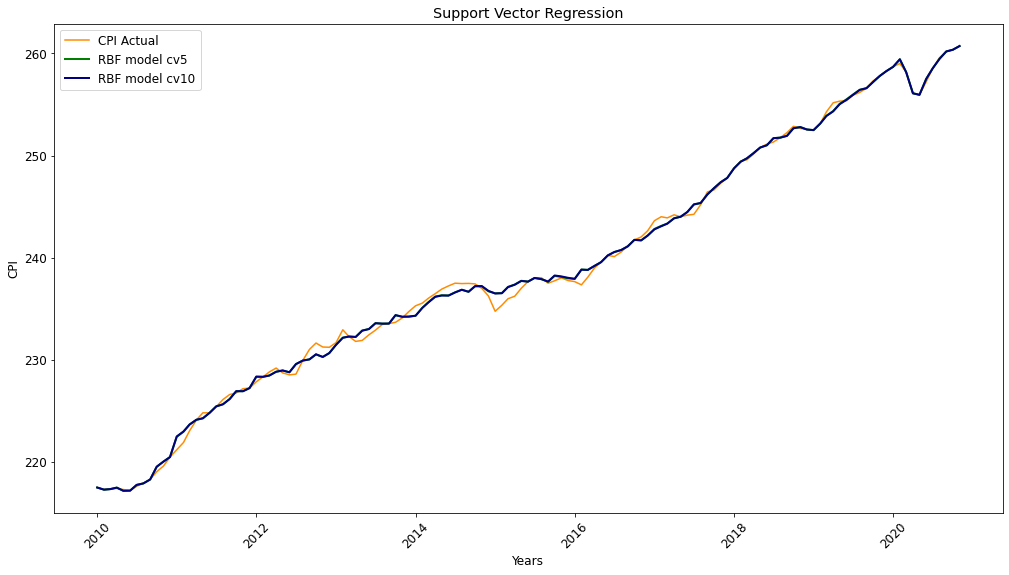

In [58]:
plt.figure(figsize=(17,9))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 45)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

lw = 2
plt.plot(np.asarray(df.iloc[:131,0], dtype='datetime64[s]'), y_all, color='darkorange', label='CPI Actual', )

plt.plot(np.asarray(df.iloc[:131,0], dtype='datetime64[s]'), y_rbf_all_cv5, color='green', lw=lw, label='RBF model cv5')
plt.plot(np.asarray(df.iloc[:131,0], dtype='datetime64[s]'), y_rbf_all_cv10, color='navy', lw=lw, label='RBF model cv10')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv5, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_poly_all_cv10, color='peru', lw=lw, label='Polynomial model')

#plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), y_linear_all, color='gray', lw=lw, label='Linear model')

plt.xlabel('Years')
plt.ylabel('CPI')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [65]:
rbf_predict_test = cv_10_rbf.predict(df.iloc[131:,10:].values)
rbf_predict_test 

array([260.95390094, 250.32176299, 251.10289695, 252.06368208,
       252.7108106 , 253.58397419, 254.70813985, 255.95297494,
       257.01045042, 257.91362775, 257.84147647, 258.55091558,
       259.49907173])

In [ ]:
poly_predict_test = cv_5_poly.predict(np.array([[2.302107,-0.59388,1.853335,1.463262,1.097651,1.299038,1.299038],
[2.340206,-0.59388,1.853335,1.435188,1.021924,1.587713,1.299038],
[2.390191,-0.59388,1.939923,1.484322,1.650060,-1.587713,1.587713],
[2.437975,-0.59388,1.939923,1.472621,1.381180,-1.299038,1.587713],
[2.488217,-0.59388,1.939923,1.458238,2.694491,-1.010363,1.587713],
[2.540715,-0.59388,2.031067,1.456990,2.605499,-0.721688,1.587713],
[2.601633,-0.59388,2.031067,1.441740,2.454968,-0.433013,1.587713],
[2.612639,-0.59388,2.031067,1.462953,2.477404,-0.144338,1.587713],
[2.644262,-0.59388,2.008281,1.486570,2.208524,0.144338,1.587713],
[2.687681,-0.59388,2.008281,1.541308,2.281021,0.433013,1.587713],
[2.714058,-0.59388,2.008281,1.578693,2.364130,0.721688,1.587713],
[2.749094,-0.59388,2.278802,1.624796,2.431148,1.010363,1.587713],
[2.788751,-0.59388,2.278802,1.683669,2.442280,1.299038,1.587713],
[2.816431,-0.59388,2.278802,1.761781,2.197854,1.587713,1.587713]]))
poly_predict_test

In [ ]:
linear_predict_test = cv_5_linear.predict(np.array([[2.749094,-0.59388,2.279354,1.010363,1.587713],
                                                   [2.788751,-0.59388,2.279354,1.299038,1.587713],
                                                   [2.816431,-0.59388,2.279354,1.587713,1.587713]]))
linear_predict_test

In [55]:
#y_actual = [276.59, 278.524, 280.126]
#y_predicted = poly_predict_3
 
MSE = mean_squared_error(y_actual, y_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

NameError: name 'y_actual' is not defined

In [56]:
y_actual = y_all
y_predicted = cv_10_rbf.best_estimator_.predict(x_all)
 
MSE = mean_squared_error(y_actual, y_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6275840247509445


In [57]:
ES = (y_predicted-y_actual)**2

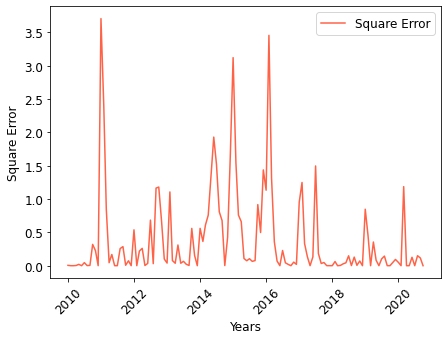

In [58]:
ES = (y_predicted-y_actual)**2
plt.figure(figsize=(7,5))
ax = plt.gca()
# 
plt.draw()
plt.xticks(rotation = 45)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.plot(np.asarray(df.iloc[:,0], dtype='datetime64[s]'), ES, color='tomato', label='Square Error')

plt.xlabel('Years')
plt.ylabel('Square Error')
plt.legend()
plt.show()

In [ ]:
#svr_rbf = SVR(kernel='rbf', C=30, gamma=0.0001, epsilon=1) #max_iter=100000)
#cv_10 = cross_val_score(svr_rbf, x_fit, y_fit,cv = 10)
#svr_lin = SVR(kernel='linear', C=1)
#svr_poly = SVR(kernel='poly', C=15, degree=10,epsilon=1)
#svr_rbf.fit(x_fit, y_fit)
#y_rbf = svr_rbf.predict(x_plot)

#y_lin = svr_lin.fit(x_fit, y_fit).predict(x_plot)
#y_poly = svr_poly.fit(x_fit, y_fit).predict(x_plot)

In [ ]:
#x_axis = df.iloc[50:100,0].tolist()

In [ ]:
#x_axis = [x_axis[0],x_axis[10],x_axis[20],x_axis[30],x_axis[40]]

In [ ]:
#np.asarray(x, dtype='datetime64[s]')

In [ ]:
#df_test.sort_values(by='DATE')